## Importing Libraries

In [2]:
#Importing
%matplotlib inline
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
import warnings

#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Import sklearn libraries - general
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Import sklearn libraries - For Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

#Import sklearn libraries - For Classification
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Getting Data - Preprocessing

In [3]:
#CSV file
data = pd.read_csv(r'Fortune 500 2017 - Fortune 500.csv')

data = data[['Title', 'Employees', 'Sector', 'Industry', 'Hqlocation', 'Hqaddr', 'Hqcity',
            'Hqstate', 'Hqzip', 'Hqtel', 'Ceo', 'Ceo-title', 'Address', 'Ticker', 'Profits']]

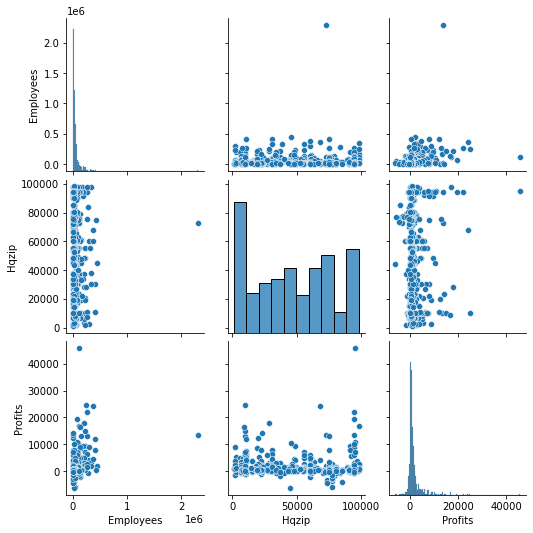

In [4]:
#Shows relationship of data between each of the columns with values which aren't strings
sns.pairplot(data)

In [5]:
#Gets the features of each column and unique values
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Title :500
The number of values for feature Employees :399
The number of values for feature Sector :21
The number of values for feature Industry :73
The number of values for feature Hqlocation :246
The number of values for feature Hqaddr :491
The number of values for feature Hqcity :239
The number of values for feature Hqstate :37
The number of values for feature Hqzip :372
The number of values for feature Hqtel :499
The number of values for feature Ceo :496
The number of values for feature Ceo-title :12
The number of values for feature Address :494
The number of values for feature Ticker :468
The number of values for feature Profits :494


In [6]:
#Checking for null data
data.isnull().sum()

Title         0
Employees     0
Sector        0
Industry      0
Hqlocation    0
Hqaddr        0
Hqcity        0
Hqstate       0
Hqzip         0
Hqtel         0
Ceo           0
Ceo-title     0
Address       0
Ticker        0
Profits       0
dtype: int64

In [6]:
data.head()

,Title,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Profits
0,Walmart,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,C. Douglas McMillon,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,13643.0
1,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,Warren E. Buffett,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,24074.0
2,Apple,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,Timothy D. Cook,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,45687.0
3,Exxon Mobil,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,Darren W. Woods,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,7840.0
4,McKesson,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,John H. Hammergren,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,2258.0


[Text(0, 0, 'Retailing'),
 Text(1, 0, 'Financials'),
 Text(2, 0, 'Technology'),
 Text(3, 0, 'Energy'),
 Text(4, 0, 'Wholesalers'),
 Text(5, 0, 'Health Care'),
 Text(6, 0, 'Motor Vehicles & Parts'),
 Text(7, 0, 'Telecommunications'),
 Text(8, 0, 'Industrials'),
 Text(9, 0, 'Food & Drug Stores'),
 Text(10, 0, 'Aerospace & Defense'),
 Text(11, 0, 'Household Products'),
 Text(12, 0, 'Food, Beverages & Tobacco'),
 Text(13, 0, 'Transportation'),
 Text(14, 0, 'Media'),
 Text(15, 0, 'Chemicals'),
 Text(16, 0, 'Apparel'),
 Text(17, 0, 'Hotels, Restaurants & Leisure'),
 Text(18, 0, 'Materials'),
 Text(19, 0, 'Business Services'),
 Text(20, 0, 'Engineering & Construction')]

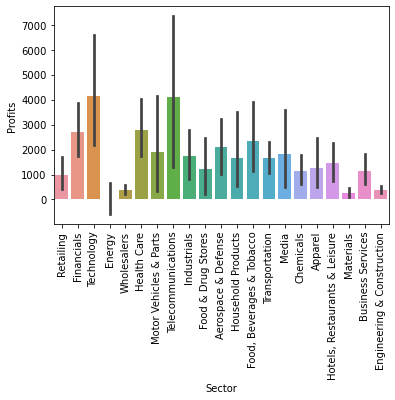

In [7]:
#Sector on Revenues
ax = sns.barplot(x="Sector", y="Profits", data=data)

#Shows the values of the bars with the number on top
#ax.bar_label(ax.containers[0])

data[['Sector', 'Profits']].groupby('Sector', as_index = False).agg({'Profits':'mean'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [8]:
#Converting the Categorical data into numeric data
#Separate tables of What I need
warnings.simplefilter(action='ignore', category=FutureWarning)

new_data = pd.get_dummies(data, columns = ['Title', 'Sector', 'Industry', 'Hqlocation', 'Hqaddr', 'Hqcity',
            'Hqstate', 'Hqzip', 'Hqtel', 'Ceo', 'Ceo-title', 'Address', 'Ticker'], drop_first=True)

new_data.dtypes

Employees                         int64
Profits                         float64
Title_A-Mark Precious Metals      uint8
Title_ABM Industries              uint8
Title_ADP                         uint8
                                 ...   
Ticker_Y                          uint8
Ticker_YHOO                       uint8
Ticker_YUM                        uint8
Ticker_YUMC                       uint8
Ticker_ZBH                        uint8
Length: 3937, dtype: object

In [4]:
# New column for classification - Abovemedianprofits column
avg = (new_data['Profits'].gt(new_data['Profits'].median())).astype(int)

avg = avg.rename('AboveMedianProfits')
new_data = new_data.join(avg)

In [5]:
new_data2 = new_data.drop(["Profits", "AboveMedianProfits"], axis=1)

In [6]:
new_data2.dtypes

Employees                       int64
Title_A-Mark Precious Metals    uint8
Title_ABM Industries            uint8
Title_ADP                       uint8
Title_AECOM                     uint8
                                ...  
Ticker_Y                        uint8
Ticker_YHOO                     uint8
Ticker_YUM                      uint8
Ticker_YUMC                     uint8
Ticker_ZBH                      uint8
Length: 3936, dtype: object

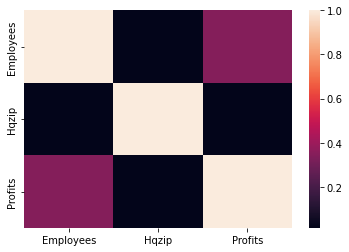

In [14]:
#Some sort of correlation to Profits
sns.heatmap(data.corr());

# Regression

### Linear Regressions

#### Linear Regression - Revenue predictions based on Employees

In [28]:
#Need variables to defined to make predictions with
x = new_data2 #Rank affecting Revenue

#Then we define the variable that we are going to predict
y = new_data['Profits']

#Split the data into training and testing data using sklearn. Define how big our testing data should be
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(350, 3936) (150, 3936) (350,) (150,)


In [29]:
#Import the Linear Regression is at the top of the page and fit it to our training set
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

#After training the model, we can evaluate the model's coefficients. We can also view them in a DataFrame likeso:
print(LinReg.coef_)
pd.DataFrame(LinReg.coef_, x.columns, columns = ['Coeff'])

[ 1.14459977e-02 -3.63388605e+02 -3.82042085e+02 ... -1.03393695e+02
  0.00000000e+00 -5.84930780e+01]


,Coeff
Employees,0.011446
Title_A-Mark Precious Metals,-363.388605
Title_ABM Industries,-382.042085
Title_ADP,170.990783
Title_AECOM,-186.267356
...,...
Ticker_Y,-187.169746
Ticker_YHOO,0.000000
Ticker_YUM,-103.393695
Ticker_YUMC,0.000000


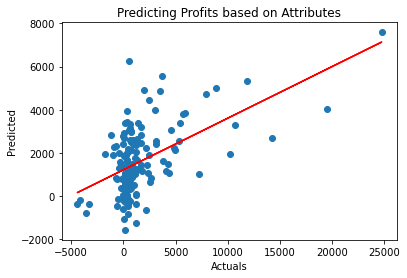

In [30]:
#Making Predictions
predictions = LinReg.predict(x_test)
plt.scatter(y_test, predictions) #scatterplot
a, b = np.polyfit(y_test, predictions, 1) #Line of best fit
plt.plot(y_test, a*y_test+b, color='red')
plt.title('Predicting Profits based on Attributes')
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.show()

In [32]:
#R2 model
r2 = r2_score(y_test, predictions)
print(r2)

0.28574996835561495


(array([ 6., 43., 70., 23.,  1.,  3.,  1.,  1.,  0.,  2.]),
 array([-5757.46971302, -3467.79086189, -1178.11201076,  1111.56684037,
         3401.24569151,  5690.92454264,  7980.60339377, 10270.2822449 ,
        12559.96109603, 14849.63994716, 17139.3187983 ]),
 <BarContainer object of 10 artists>)

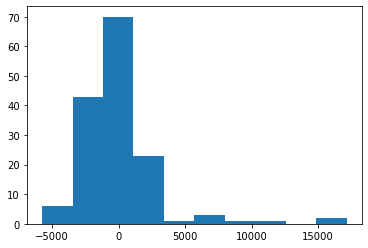

In [33]:
plt.hist(y_test - predictions) #Histogram

In [34]:
#Evaluating Performance
#Absolute Error - This means it is this amount on average away from the actual
metrics.mean_absolute_error(y_test, predictions)

1803.5401959334508

In [35]:
#Squared Error - Lower the value the better and 0 means it is a perfect model
metrics.mean_squared_error(y_test, predictions)

8853757.94794863

### LASSO Regression & Ridge Regression

In [36]:
ridge = linear_model.Ridge()

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.05)

#Define search
search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#Perform the search
results = search.fit(x_train, y_train)

# Summarize
print('Mean Absolute Error (MAE): %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

#Converts Alpha
r = results.best_params_
r = list(r.values())[0]

#Predictions
pipeline = make_pipeline(StandardScaler(), linear_model.Ridge(alpha=r))
pipeline.fit(x_train, y_train)

#Calculate the predicted value for training and test dataset
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)

print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error (MAE): -2004.284
Config: {'alpha': 0.9500000000000001}
MSE train: 1.776, test: 11329651.593
R^2 train: 1.000, test: 0.086


In [37]:
lasso = linear_model.Lasso()

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define grid
lgrid = dict()
lgrid['alpha'] = arange(0, 1, 0.05)

#Define search
lsearch = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#Perform the search
lresults = search.fit(x_train, y_train)

# Summarize
print('Mean Absolute Error (MAE): %.3f' % lresults.best_score_)
print('Config: %s' % lresults.best_params_)

#Converts Alpha
lr = lresults.best_params_
lr = list(lr.values())[0]

#Predictions
lpipeline = make_pipeline(StandardScaler(), linear_model.Lasso(alpha=lr))
lpipeline.fit(x_train, y_train)

#Calculate the predicted value for training and test dataset
ly_train_pred = pipeline.predict(x_train)
ly_test_pred = pipeline.predict(x_test)

print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, ly_train_pred), metrics.mean_squared_error(y_test, ly_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (metrics.r2_score(y_train, ly_train_pred), metrics.r2_score(y_test, ly_test_pred)))

Mean Absolute Error (MAE): -2004.284
Config: {'alpha': 0.9500000000000001}
MSE train: 1.776, test: 11329651.593
R^2 train: 1.000, test: 0.086


# Classification

### Multilayer perceptrons - Classifier

In [142]:
#Get rid of warnings
warnings.simplefilter(action='ignore', category=UserWarning)

#Data
d = new_data

#Parameters for MLPClassifer
ite = 100

mlp_gs = MLPClassifier(max_iter=ite)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

#This is done jsut in case I mix data up
#Need variables to defined to make predictions with
x2 = d.loc[:, d.columns != ('AboveMedianProfits', 'Profits')] # Profits affecting results

#Then we define the variable that we are going to predict
y2 = d['AboveMedianProfits']


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30)

clf.fit(x2_train, y2_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        75
           1       0.96      0.69      0.81        75

    accuracy                           0.83       150
   macro avg       0.86      0.83      0.83       150
weighted avg       0.86      0.83      0.83       150

[[73  2]
 [23 52]]



              precision    recall  f1-score   support

           0       0.76      0.97      0.85        75
           1       0.96      0.69      0.81        75

    accuracy                           0.83       150
   macro avg       0.86      0.83      0.83       150
weighted avg       0.86      0.83      0.83       150

[[73  2]
 [23 52]]


<AxesSubplot:xlabel='AboveMedianProfits'>

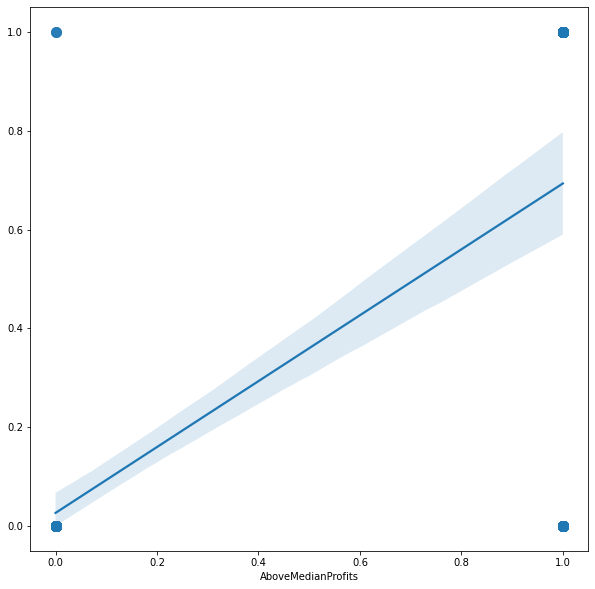

In [144]:
#Predictions
expected_y  = y2_test
predicted_y = clf.predict(x2_test)

print()

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### Multilayer perceptrons - Regressor

In [18]:
#Get rid of warnings
warnings.simplefilter(action='ignore', category=UserWarning)

#Data
d = new_data

#Parameters for MLPRegressor
ite = 100

#Model for MLPClassifer - This method takes a while
mlp_gs = MLPRegressor(max_iter=ite)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

#This is done jsut in case I mix data up
#Need variables to defined to make predictions with
x2 = d.loc[:, d.columns != ('AboveMedianProfits', 'Profits')] # Profits affecting results

#Then we define the variable that we are going to predict
y2 = d['Profits']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30)

clf.fit(x2_train, y2_train)

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


0.9875392976175555


<AxesSubplot:xlabel='Profits'>

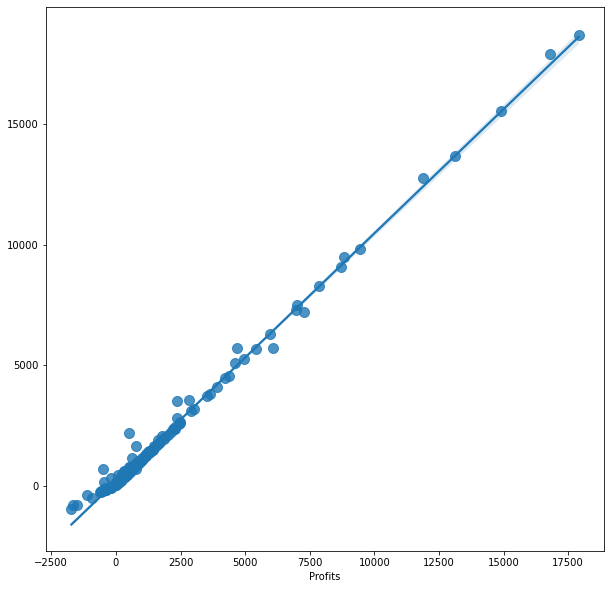

In [19]:
expected_y  = y2_test
predicted_y = clf.predict(x2_test)

print(clf.score(x2_test, y2_test))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})